In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Loading dataset

In [125]:
df=pd.read_csv("Training Dataset.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Explore Dataset

In [126]:
df.shape

(614, 13)

In [127]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [128]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Exploratory Data Analysis

In [130]:
df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [131]:
df.groupby('Gender')['Loan_Status'].value_counts()

Gender  Loan_Status
Female  Y               75
        N               37
Male    Y              339
        N              150
Name: count, dtype: int64

Text(0.5, 1.0, 'Loan_status by Gender')

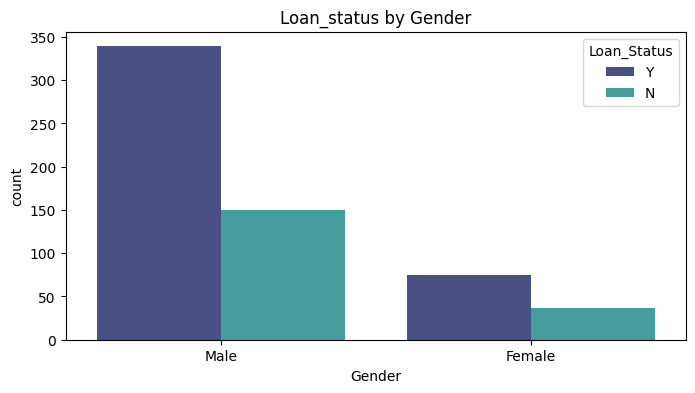

In [132]:
plt.figure(figsize=(8,4))
sns.countplot(data=df,x='Gender',hue='Loan_Status',palette='mako')
plt.title("Loan_status by Gender")

Percentage approved by gender

In [133]:
total_women = df[df['Gender'] == 'Female'].shape[0]
approved_women = df[(df['Gender'] == 'Female') & (df['Loan_Status'] == 'Y')].shape[0]
percent_approved_women = (approved_women / total_women) * 100
print(f"Percentage of female with approved Loan Status:{percent_approved_women}")

total_men = df[df['Gender'] == 'Male'].shape[0]
approved_men = df[(df['Gender'] == 'Male') & (df['Loan_Status'] == 'Y')].shape[0]
percent_approved_men = (approved_men / total_men) * 100
print(f"Percentage of Male with approved Loan Status:{percent_approved_men}")


Percentage of female with approved Loan Status:66.96428571428571
Percentage of Male with approved Loan Status:69.32515337423312


In [134]:
df.groupby('Married')['Loan_Status'].value_counts()

Married  Loan_Status
No       Y              134
         N               79
Yes      Y              285
         N              113
Name: count, dtype: int64

Text(0.5, 1.0, 'Loan_status by Marital Status')

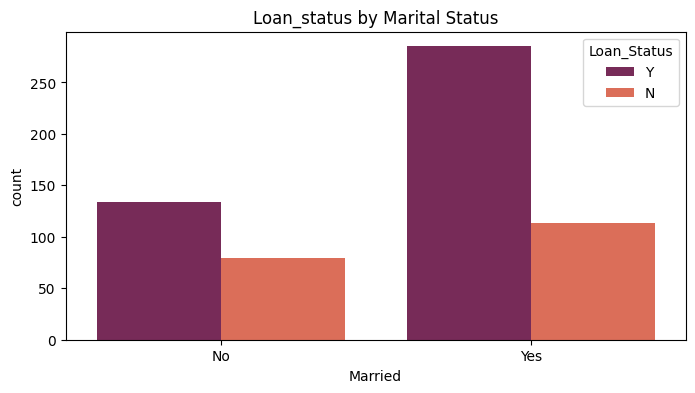

In [135]:
plt.figure(figsize=(8,4))
sns.countplot(data=df,x='Married',hue='Loan_Status',palette='rocket')
plt.title("Loan_status by Marital Status")

In [136]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [137]:
df['Dependents'].replace('3+','3',inplace=True)
df['Dependents'].value_counts()

Dependents
0    345
1    102
2    101
3     51
Name: count, dtype: int64

In [138]:
labels=list(df['Dependents'].unique())
labels


['0', '1', '2', '3', nan]

<Axes: ylabel='count'>

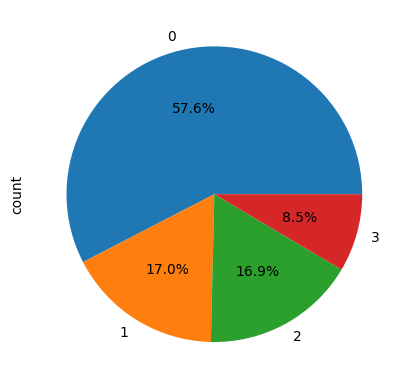

In [139]:
df['Dependents'].value_counts().plot(kind='pie', autopct="%1.1f%%")

Text(0.5, 1.0, 'Loan status by Dependent number')

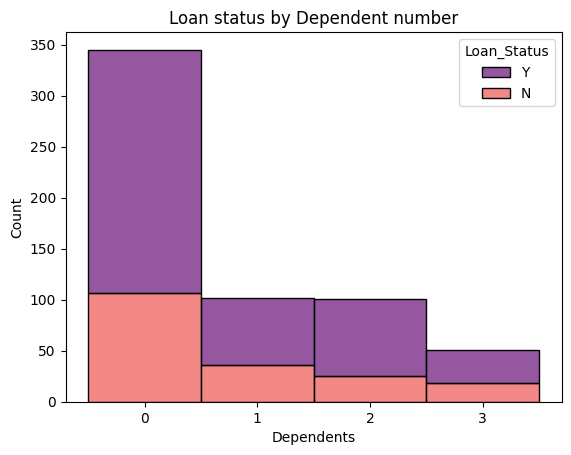

In [140]:
sns.histplot(df, x="Dependents", hue="Loan_Status", multiple="stack",palette='magma')
plt.title("Loan status by Dependent number")

In [141]:
df.groupby('Education')['Loan_Status'].value_counts()

Education     Loan_Status
Graduate      Y              340
              N              140
Not Graduate  Y               82
              N               52
Name: count, dtype: int64

Text(0.5, 1.0, 'Loan_status by Education')

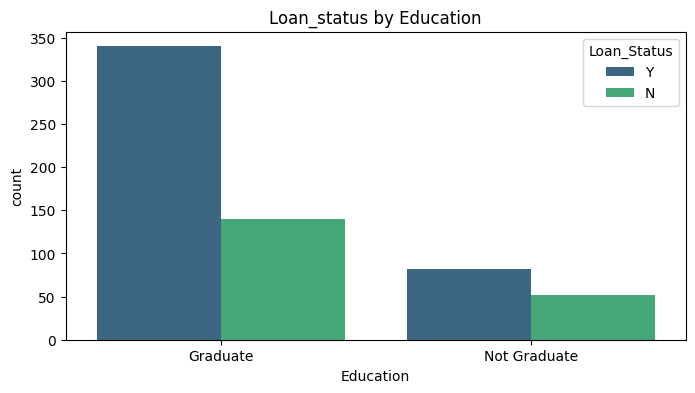

In [142]:
plt.figure(figsize=(8,4))
sns.countplot(data=df,x='Education',hue='Loan_Status',palette='viridis')
plt.title("Loan_status by Education")

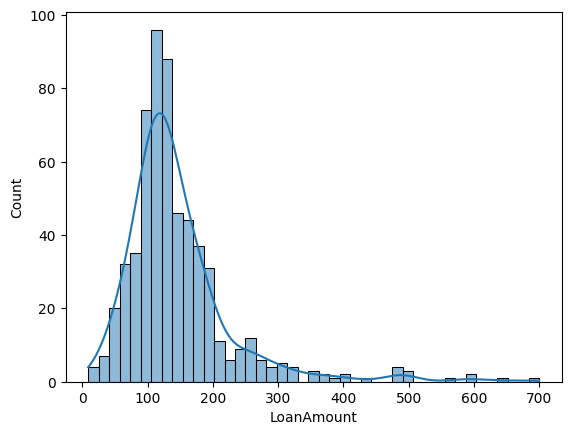

In [143]:
sns.histplot(x=df['LoanAmount'], kde=True)
plt.show()

In [144]:
#presence of large number of outliers

In [145]:
max=df["LoanAmount"].max()
print(f"Maximum LoanAmount:{max}")
min=df["LoanAmount"].min()
print(f"Minimum LoanAmount:{min}")

Maximum LoanAmount:700.0
Minimum LoanAmount:9.0


In [146]:
mean=df['LoanAmount'].mean()
mean

146.41216216216216

In [147]:
less_mean=df[df['LoanAmount']<mean]
more_mean=df[df['LoanAmount']>=mean]
more_mean['LoanAmount'].count()

210

In [148]:
less_mean['LoanAmount'].count()

382

In [149]:
def categorize_amount(row):
    if row < mean:
        return 'Less than average'
    else:
        return 'Greater than average'

In [150]:
df['Amount'] = df['LoanAmount'].apply(categorize_amount)

In [151]:
df.groupby("Amount")['Loan_Status'].value_counts()

Amount                Loan_Status
Greater than average  Y              148
                      N               84
Less than average     Y              274
                      N              108
Name: count, dtype: int64

In [152]:
Greater_Than_average = df[df['Amount'] == 'Greater than average'].shape[0]
approved_greater = df[(df['Amount'] == 'Greater than average') & (df['Loan_Status'] == 'Y')].shape[0]
percent_approved = (approved_greater / Greater_Than_average ) * 100
print(f"Percentage of LoanAmount greater than average with approved Loan Status:{percent_approved}")

Less_Than_average = df[df['Amount'] == 'Less than average'].shape[0]
approved_less = df[(df['Amount'] == 'Less than average') & (df['Loan_Status'] == 'Y')].shape[0]
percent_approved = (approved_less / Less_Than_average ) * 100
print(f"Percentage of LoanAmount less than average with approved Loan Status:{percent_approved}")


Percentage of LoanAmount greater than average with approved Loan Status:63.793103448275865
Percentage of LoanAmount less than average with approved Loan Status:71.72774869109948


<Axes: xlabel='Amount', ylabel='count'>

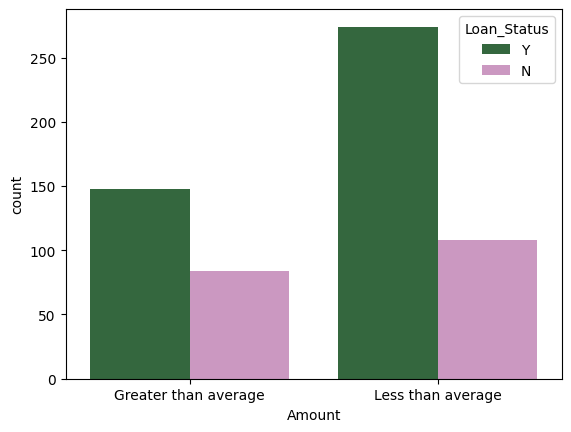

In [153]:
sns.countplot(data=df,x='Amount',hue='Loan_Status',palette='cubehelix')

In [154]:
df.drop(columns=['Amount'], inplace=True)

In [155]:
df.groupby('Property_Area')['Loan_Status'].value_counts()

Property_Area  Loan_Status
Rural          Y              110
               N               69
Semiurban      Y              179
               N               54
Urban          Y              133
               N               69
Name: count, dtype: int64

<Axes: xlabel='Loan_Status', ylabel='count'>

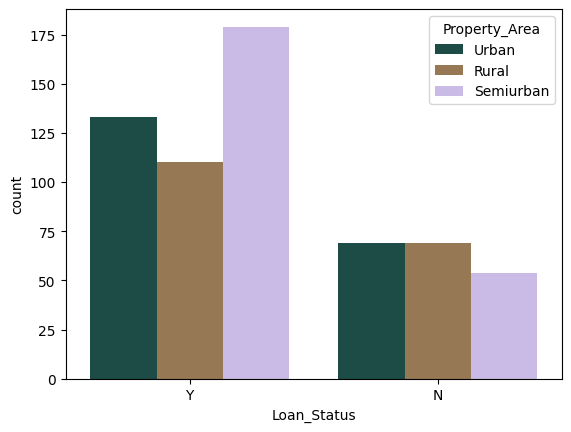

In [156]:
sns.countplot(data=df,x='Loan_Status',hue='Property_Area',palette='cubehelix')

In [157]:
df['Loan_Amount_Term'].value_counts()


Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [158]:
data=df[df['Loan_Status']=="Y"]
data['Loan_Amount_Term'].value_counts()


Loan_Amount_Term
360.0    359
180.0     29
300.0      8
480.0      6
120.0      3
240.0      3
84.0       3
60.0       2
12.0       1
Name: count, dtype: int64

C:\Users\KIIT01\AppData\Local\Temp\ipykernel_21304\3535782453.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data,x='Loan_Amount_Term',binwidth=30,palette='seagreen')


<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

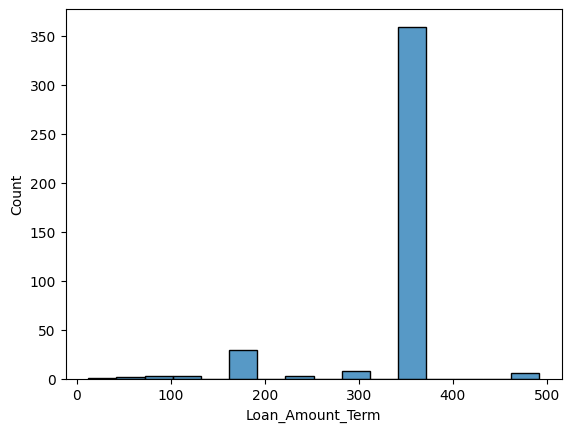

In [159]:
sns.histplot(data,x='Loan_Amount_Term',binwidth=30,palette='seagreen')

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

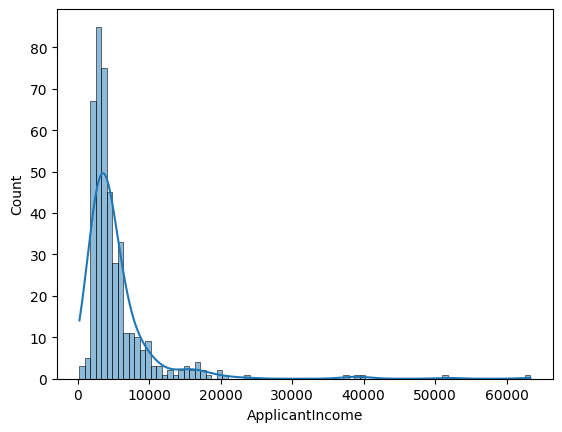

In [160]:
sns.histplot(data,x='ApplicantIncome',kde=True)

In [161]:
#Large number of outliers

In [162]:
df['ApplicantIncome'].mean()

5403.459283387622

Condition of Loan Approval based on self employment

In [163]:
df['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [164]:
#approved case
data['Self_Employed'].value_counts()

Self_Employed
No     343
Yes     56
Name: count, dtype: int64

Data Cleaning

In [165]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [166]:
df['Credit_History'].value_counts()
    

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [167]:
df.groupby('Credit_History')['Loan_Status'].value_counts()

Credit_History  Loan_Status
0.0             N               82
                Y                7
1.0             Y              378
                N               97
Name: count, dtype: int64

Replacing Null value with either most frequent element or mean of the column

In [168]:
df=df.dropna(subset=['Credit_History'])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [169]:
df.isnull().sum()

Loan_ID               0
Gender               12
Married               3
Dependents           15
Education             0
Self_Employed        26
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [170]:
most_frequent_dependents = df['Dependents'].mode()[0]
most_frequent_dependents

'0'

In [171]:
df['Dependents'].fillna(most_frequent_dependents, inplace=True)

In [172]:
most_frequent_marriedstatus = df['Married'].mode()[0]
most_frequent_marriedstatus 

'Yes'

In [173]:
df['Married'].fillna(most_frequent_marriedstatus, inplace=True)

In [174]:
most_frequent_gender = df['Gender'].mode()[0]
most_frequent_gender 

'Male'

In [175]:
df['Gender'].fillna(most_frequent_gender, inplace=True)

In [176]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [177]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

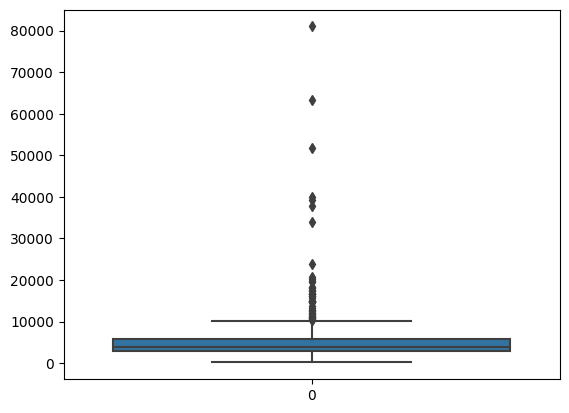

In [178]:
sns.boxplot(df['ApplicantIncome'])


<Axes: >

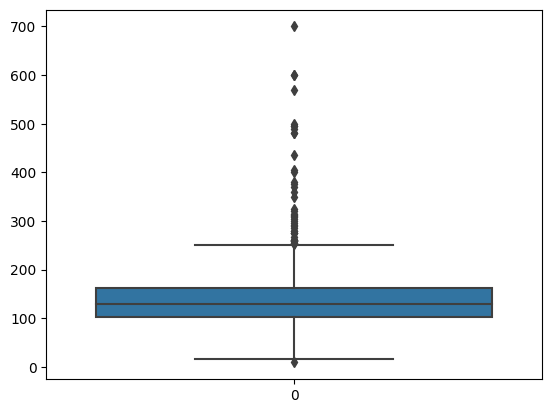

In [179]:
sns.boxplot(df['LoanAmount'])

In [180]:
def remove_outliers(df, column_name):
 
    # Calculate the first (Q1) and third quartiles (Q3) for the column
    Q1 = np.percentile(df[column_name], 25)
    Q3 = np.percentile(df[column_name], 75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Define the outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the DataFrame to remove outliers in the specified column
    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return filtered_df

In [181]:
df=remove_outliers(df, 'LoanAmount')
df=remove_outliers(df, 'ApplicantIncome')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,145.088398,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.000000,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


<Axes: >

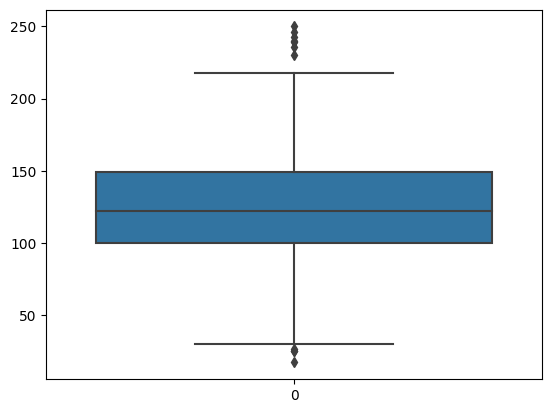

In [182]:
sns.boxplot(df['LoanAmount'])#cleaned data from outliers

<Axes: >

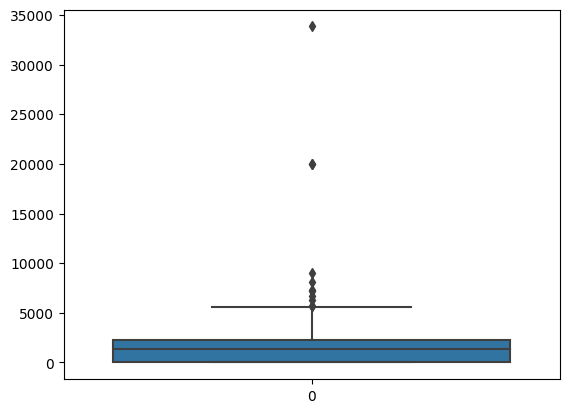

In [183]:
sns.boxplot(df['CoapplicantIncome'])

In [184]:
df=remove_outliers(df, 'CoapplicantIncome')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,145.088398,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.000000,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [185]:
df.drop(columns='Loan_ID',axis=1,inplace=True)
df

C:\Users\KIIT01\AppData\Local\Temp\ipykernel_21304\4206531837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='Loan_ID',axis=1,inplace=True)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,145.088398,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
608,Male,Yes,0,Graduate,No,3232,1950.0,108.000000,360.0,1.0,Rural,Y
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [186]:
numeric_column=[column for column in df.columns if df[column].dtype =='int64' or df[column].dtype =='float64']
numeric_column

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [187]:
numeric_column.remove('Credit_History')
numeric_column

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [188]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numeric_column] = scaler.fit_transform(df[numeric_column])

C:\Users\KIIT01\AppData\Local\Temp\ipykernel_21304\2203526713.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_column] = scaler.fit_transform(df[numeric_column])


In [189]:
df[numeric_column]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1.276458,-0.968366,0.534049,0.246018
1,0.465183,0.152769,0.113111,0.246018
2,-0.549231,-0.968366,-1.414130,0.246018
3,-0.816452,0.784708,-0.083952,0.246018
4,1.373221,-0.968366,0.433339,0.246018
...,...,...,...,...
608,-0.400562,0.481377,-0.379547,0.246018
609,-0.613313,-0.968366,-1.290965,0.246018
610,0.159513,-0.968366,-2.054586,-2.588452
612,2.387635,-0.968366,1.566454,0.246018


In [190]:
from sklearn.preprocessing import LabelEncoder
categorical_column=[column for column in df.columns if df[column].dtype =='object']
categorical_column

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [191]:
le_gender=LabelEncoder()
le_Married=LabelEncoder()
le_Dependents=LabelEncoder()
le_Education=LabelEncoder()
le_Self_Employed=LabelEncoder()
le_Property_Area=LabelEncoder()
le_Loan_Status=LabelEncoder()
encoder=[le_gender,le_Married,le_Dependents,le_Education,le_Self_Employed,le_Property_Area,le_Loan_Status]
i=0
for column in categorical_column:
    
    df[column]=encoder[i].fit_transform(df[column])
    i+=1

C:\Users\KIIT01\AppData\Local\Temp\ipykernel_21304\117256657.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column]=encoder[i].fit_transform(df[column])
C:\Users\KIIT01\AppData\Local\Temp\ipykernel_21304\117256657.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column]=encoder[i].fit_transform(df[column])
C:\Users\KIIT01\AppData\Local\Temp\ipykernel_21304\117256657.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [192]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,1.276458,-0.968366,0.534049,0.246018,1.0,2,1
1,1,1,1,0,0,0.465183,0.152769,0.113111,0.246018,1.0,0,0
2,1,1,0,0,1,-0.549231,-0.968366,-1.414130,0.246018,1.0,2,1
3,1,1,0,1,0,-0.816452,0.784708,-0.083952,0.246018,1.0,2,1
4,1,0,0,0,0,1.373221,-0.968366,0.433339,0.246018,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
608,1,1,0,0,0,-0.400562,0.481377,-0.379547,0.246018,1.0,0,1
609,0,0,0,0,0,-0.613313,-0.968366,-1.290965,0.246018,1.0,0,1
610,1,1,3,0,0,0.159513,-0.968366,-2.054586,-2.588452,1.0,0,1
612,1,1,2,0,0,2.387635,-0.968366,1.566454,0.246018,1.0,2,1


In [193]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,1.276458,-0.968366,0.534049,0.246018,1.0,2,1
1,1,1,1,0,0,0.465183,0.152769,0.113111,0.246018,1.0,0,0
2,1,1,0,0,1,-0.549231,-0.968366,-1.414130,0.246018,1.0,2,1
3,1,1,0,1,0,-0.816452,0.784708,-0.083952,0.246018,1.0,2,1
4,1,0,0,0,0,1.373221,-0.968366,0.433339,0.246018,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
608,1,1,0,0,0,-0.400562,0.481377,-0.379547,0.246018,1.0,0,1
609,0,0,0,0,0,-0.613313,-0.968366,-1.290965,0.246018,1.0,0,1
610,1,1,3,0,0,0.159513,-0.968366,-2.054586,-2.588452,1.0,0,1
612,1,1,2,0,0,2.387635,-0.968366,1.566454,0.246018,1.0,2,1


Modelling

In [194]:
df.columns


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [195]:
df['Loan_Amount_Term'].min()

-4.856028401551789

In [196]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay, classification_report

In [197]:
X=df.drop(columns=['Loan_Status'])
Y=df['Loan_Status']

In [198]:
models=[LogisticRegression(max_iter=1000),SVC(kernel='linear'),KNeighborsClassifier(),RandomForestClassifier(),GaussianNB()]

In [199]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=3)

In [200]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [201]:
def compare_models():
    for model in models:
        model.fit(X_train,Y_train)
        data_predict=model.predict(X_test)
        accuracy=accuracy_score(Y_test,data_predict)
        conf_matrix = confusion_matrix(Y_test, data_predict)
        class_report = classification_report(Y_test, data_predict)
        print(f"Accuracy of the model {model} = {round(accuracy*100,2)}%.")
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=df['Loan_Status'].unique())
        disp.plot(cmap=plt.cm.Blues)
        plt.show()
        print("Classification Report:")
        print(class_report)

Accuracy of the model LogisticRegression(max_iter=1000) = 84.04%.


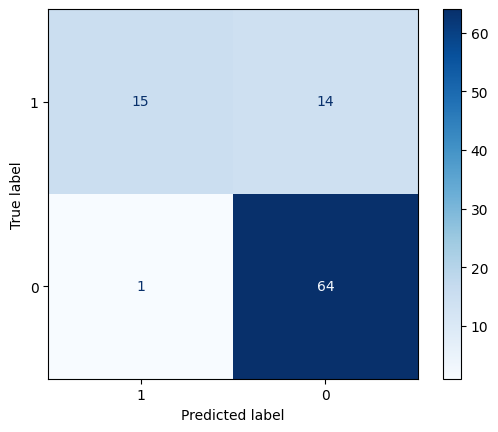

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.52      0.67        29
           1       0.82      0.98      0.90        65

    accuracy                           0.84        94
   macro avg       0.88      0.75      0.78        94
weighted avg       0.86      0.84      0.82        94

Accuracy of the model SVC(kernel='linear') = 84.04%.


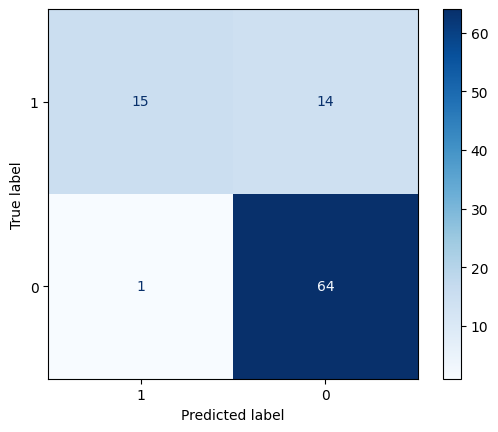

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.52      0.67        29
           1       0.82      0.98      0.90        65

    accuracy                           0.84        94
   macro avg       0.88      0.75      0.78        94
weighted avg       0.86      0.84      0.82        94

Accuracy of the model KNeighborsClassifier() = 69.15%.


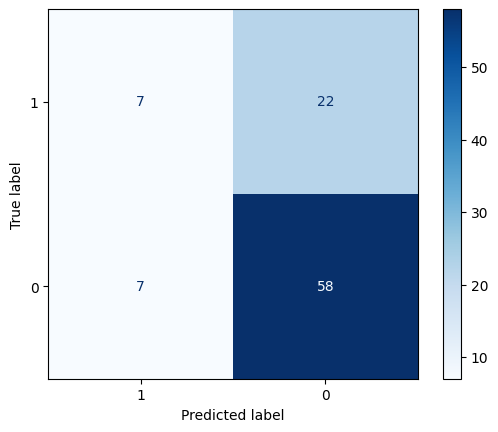

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.24      0.33        29
           1       0.72      0.89      0.80        65

    accuracy                           0.69        94
   macro avg       0.61      0.57      0.56        94
weighted avg       0.66      0.69      0.65        94

Accuracy of the model RandomForestClassifier() = 84.04%.


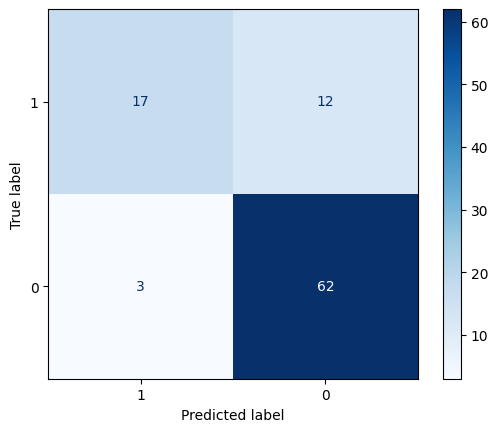

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.59      0.69        29
           1       0.84      0.95      0.89        65

    accuracy                           0.84        94
   macro avg       0.84      0.77      0.79        94
weighted avg       0.84      0.84      0.83        94

Accuracy of the model GaussianNB() = 85.11%.


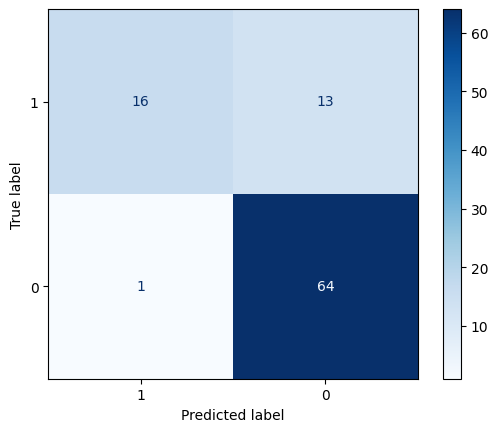

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.55      0.70        29
           1       0.83      0.98      0.90        65

    accuracy                           0.85        94
   macro avg       0.89      0.77      0.80        94
weighted avg       0.87      0.85      0.84        94



In [202]:
compare_models()

Using cross validation

In [203]:
from sklearn.model_selection import cross_val_score

1.Logistic Regression

In [204]:
cv_score_lr=cross_val_score(LogisticRegression(max_iter=1000),X,Y,cv=5)
print(cv_score_lr)

[0.84042553 0.79787234 0.79569892 0.86021505 0.84946237]


In [205]:
mean_accuracy_lr=round((sum(cv_score_lr)/len(cv_score_lr))*100,2)
print(mean_accuracy_lr)

82.87


2.SVM

In [206]:
cv_score_svc=cross_val_score(SVC(kernel='linear'),X,Y,cv=5)
print(cv_score_svc)

[0.84042553 0.79787234 0.79569892 0.87096774 0.84946237]


In [207]:
mean_accuracy_svc=round((sum(cv_score_svc)/len(cv_score_svc))*100,2)
print(mean_accuracy_svc)

83.09


In [208]:
import pickle
with open('models.pickle', 'wb') as file:
    pickle.dump(models, file)
with open('scaler.pickle', 'wb') as file:
    pickle.dump(scaler, file)
with open('label.pickle', 'wb') as file:
    pickle.dump(encoder, file)

print("Models have been pickled and saved successfully.")

Models have been pickled and saved successfully.


Importing given Test data

In [209]:
test_df=pd.read_csv("Test Dataset.csv")
test_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [87]:
test_df.shape[1]

12

In [88]:
test_df.drop(columns='Loan_ID',inplace=True)

In [89]:
test_df.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [90]:
test_df.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [91]:
test_df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: count, dtype: int64

In [92]:
test_df['Dependents'].replace('3+', '3', inplace=True)
test_df['LoanAmount'].fillna(test_df['LoanAmount'].mean(), inplace=True)
test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].mode()[0], inplace=True)
test_df['Credit_History'].fillna(test_df['Credit_History'].median(), inplace=True)

In [93]:
most_frequent_dependents = test_df['Dependents'].mode()[0]
most_frequent_dependents
test_df['Dependents'].fillna(most_frequent_dependents, inplace=True)

In [94]:
most_frequent_gender = test_df['Gender'].mode()[0]
most_frequent_gender
test_df['Gender'].fillna(most_frequent_gender, inplace=True)

In [95]:
test_df['Self_Employed'].value_counts()

Self_Employed
No     307
Yes     37
Name: count, dtype: int64

In [96]:
test_df['Self_Employed'].fillna('No',inplace=True)

In [97]:
categorical_column

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [98]:
categorical_column.remove('Loan_Status')
le=LabelEncoder()
for column in categorical_column:
    test_df[column]=le.fit_transform(test_df[column])

In [99]:
test_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [100]:
test_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,4009,1777,113.0,360.0,1.0,2
363,1,1,0,0,0,4158,709,115.0,360.0,1.0,2
364,1,0,0,0,0,3250,1993,126.0,360.0,1.0,1
365,1,1,0,0,0,5000,2393,158.0,360.0,1.0,0


In [101]:
scaler = StandardScaler()
test_df[numeric_column] = scaler.fit_transform(test_df[numeric_column])

In [102]:
test_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,0.186461,-0.673335,-0.429368,0.266022,1.0,2
1,1,1,1,0,0,-0.352692,-0.029848,-0.166482,0.266022,1.0,2
2,1,1,2,0,0,0.039641,0.098849,1.180807,0.266022,1.0,2
3,1,1,2,0,0,-0.502774,0.418877,-0.593671,0.266022,1.0,2
4,1,0,0,1,0,-0.311909,-0.673335,-0.955139,0.266022,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,-0.162439,0.088982,-0.380077,0.266022,1.0,2
363,1,1,0,0,0,-0.132056,-0.369180,-0.347216,0.266022,1.0,2
364,1,0,0,0,0,-0.317211,0.181644,-0.166482,0.266022,1.0,1
365,1,1,0,0,0,0.039641,0.353241,0.359289,0.266022,1.0,0


In [103]:
test_result=pd.read_csv('Sample_Submission.csv')
test_result

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [104]:
test_result['Loan_Status'].value_counts()

Loan_Status
N    367
Name: count, dtype: int64

In [105]:
le = LabelEncoder()
test_result['Loan_Status'] = le.fit_transform(test_result['Loan_Status'])

In [106]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,1.276458,-0.968366,0.534049,0.246018,1.0,2,1
1,1,1,1,0,0,0.465183,0.152769,0.113111,0.246018,1.0,0,0
2,1,1,0,0,1,-0.549231,-0.968366,-1.414130,0.246018,1.0,2,1
3,1,1,0,1,0,-0.816452,0.784708,-0.083952,0.246018,1.0,2,1
4,1,0,0,0,0,1.373221,-0.968366,0.433339,0.246018,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
608,1,1,0,0,0,-0.400562,0.481377,-0.379547,0.246018,1.0,0,1
609,0,0,0,0,0,-0.613313,-0.968366,-1.290965,0.246018,1.0,0,1
610,1,1,3,0,0,0.159513,-0.968366,-2.054586,-2.588452,1.0,0,1
612,1,1,2,0,0,2.387635,-0.968366,1.566454,0.246018,1.0,2,1


In [107]:
X=df.drop(columns=['Loan_Status'])
Y=df['Loan_Status']
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,1.276458,-0.968366,0.534049,0.246018,1.0,2
1,1,1,1,0,0,0.465183,0.152769,0.113111,0.246018,1.0,0
2,1,1,0,0,1,-0.549231,-0.968366,-1.414130,0.246018,1.0,2
3,1,1,0,1,0,-0.816452,0.784708,-0.083952,0.246018,1.0,2
4,1,0,0,0,0,1.373221,-0.968366,0.433339,0.246018,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
608,1,1,0,0,0,-0.400562,0.481377,-0.379547,0.246018,1.0,0
609,0,0,0,0,0,-0.613313,-0.968366,-1.290965,0.246018,1.0,0
610,1,1,3,0,0,0.159513,-0.968366,-2.054586,-2.588452,1.0,0
612,1,1,2,0,0,2.387635,-0.968366,1.566454,0.246018,1.0,2


In [108]:
models=[LogisticRegression(),SVC(kernel='linear'),KNeighborsClassifier(),RandomForestClassifier()]

In [109]:
def prediction_models():
    for model in models:
        model.fit(X,Y)
        X_predict=model.predict(test_df)
        print(f"{model}:")
        print(X_predict)
    return X_predict

In [110]:
prediction_models()

LogisticRegression():
[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
SVC(kernel='linear'):
[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

In [111]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X,Y)
prediction = rfc.predict(test_df)
prediction

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

In [112]:
test_result['Loan_Status']=prediction

In [113]:
test_result.head(10)

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
5,LP001054,1
6,LP001055,1
7,LP001056,0
8,LP001059,1
9,LP001067,1


In [114]:
test_result.to_csv('MY_Submission.csv',index=False)